In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import struct
import random

In [2]:
# This part of the code is used from https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40
# Read the IDX format files
def convertFormat(name):
    
    # Open and read the file
    with open(name, 'rb') as file:
        
        a, b, c = struct.unpack('>HBB', file.read(4))
        dimensions = c
        shape = struct.unpack('>I', file.read(4))[0] for d in range(dimensions)
        shape = tuple(shape)
        
        result = np.fromstring(file.read(), dtype=np.uint8)
        result = result.reshape(shape)
        
        return result

In [3]:
# Error Calculation
def errorCalculations(testData, testLabels):
    numErrors = 0
    x = 0

    while (x<len(testData)):
        samplePrime = testData[x]
        s = samplePrime.shape

        try:
            if s != (784, 1):
                samplePrime.resize(784, 1)

            predictedValue = (np.matmul(w, samplePrime)).argmax(axis=0)
            actualValue = testLabels[x]

        except ValueError:
            print("The size of the sample is incorrect!")

        if predictedValue == actualValue:
            pass
        else:
            numErrors += 1

        x += 1

    finalNumErrors = numErrors
    errorRate = (finalNumErrors/len(testData))*100

    return [finalNumErrors, errorRate]

In [4]:
# Main Function
def multiclassPTA(w, epoch, E, eta, errors, n):

    # Compute the activation function 
    def stepActivationFunction(result, empty):
        
        i = 0

        while (i<len(result)):
            if result[i] < 0:
                empty[i] = 0.0
            else:
                empty[i] = 1.0
            i += 1

        return  np.array(empty)

    # This is the training phase
    def errorComputations(epoch, errors, n):

        x = 0

        while (x < n):
            sample = trainData[x]
            s = sample.shape

            try:
                if s != (784, 1):
                    sample.resize(784, 1)
                else:
                    pass
                predictedValue = (np.matmul(w, sample)).argmax(axis=0)
                actualValue = trainLabels[x]
            except ValueError:
                print("The size of the sample is incorrect!")

            if predictedValue == actualValue:
                pass
            else:
                errors[epoch] += 1

            x += 1

        return errors[epoch]

    # This is to update the weights
    def updateWeights(w, n, eta, weightsVector):

        x = 0
        range = [10, 1]

        while (x < n):
            sample = trainData[x]
            s = sample.shape

            try:
                if s != (784, 1):
                    sample.resize(784, 1)
                else:
                    pass
                sampleTranspose = np.transpose(sample)

                empty = np.empty(range)

                try:
                    y = stepActivationFunction(np.matmul(w, sample), empty)
                except ValueError:
                    print("The dimension of resulting vector is incorrect!")

                dxi = np.array(np.zeros((1, 10)).T)
                dxi[trainLabels[x]] = 1

                # Updation occurs here
                w += eta * (np.matmul((dxi - y), sampleTranspose))
                weightVector.append(w)

            except IOError:
                print("There was something wrong in the calculations of dimensions!")

            x += 1

        #print("Weights updated!")


    flag = True
    weightVector = []

    while (flag==True):

        errors.append(0)
        errors[epoch] = errorComputations(epoch, errors, n)
        updateWeights(w, n, eta, weightVector)
        epoch += 1
        #print(errors[epoch-1]/n)

        if errors[epoch-1]/n > E:
            flag = True
        else:
            flag = False
            stoppingEpoch = epoch

    print("Stopping Epoch is {}".format(stoppingEpoch))

    if flag == False:
        l = len(errors)
        print("-------------------")
        print(len(errors))
        print(errors)
        #print(errors.min())
        plt.plot(range(l), errors, c='red', linewidth=2, markersize=5)
        plt.plot(range(l), errors, c='red')
        plt.title('Misclassifications Graph')
        plt.title('High', loc='left')
        plt.title('Low', loc='right')
        plt.ylabel('Misclassification Errors')
        plt.xlabel('Epoch Numbers')
        plt.grid(True)
        plt.show()

In [5]:
def loadData():

    trainData = convertFormat('train-images.idx3-ubyte')
    testData = convertFormat('t10k-images.idx3-ubyte')
    trainLabels = convertFormat('train-labels.idx1-ubyte')
    testLabels = convertFormat ('t10k-labels.idx1-ubyte')

    return trainData, trainLabels, testData, testLabels

In [6]:
trainData, trainLabels, testData, testLabels = loadData()

# Set the random seed
np.random.seed(10)
size = (10, 784)
w = np.random.uniform(-1.0, 1.0, size)

c:\users\sriram veturi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


Case 1 Results :
Stopping Epoch is 5
-------------------
5
[47, 15, 5, 1, 0]


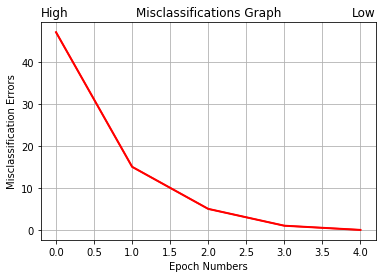

Total number of errors = 4482
Error Percentage = 44.82%


In [7]:
# Case 1
print("Case 1 Results :")
n = 50
epoch = 0
E = 0.0
eta = 1.0
errors = []
multiclassPTA(w, epoch, E, eta, errors, n)
e = errorCalculations(testData, testLabels)
print("Total number of errors = {}".format(e[0]))
print("Error Percentage = {}%".format(e[1]))

# Note : 
The training error rate comes down to 0 because of the weight updation after every iteration. After 4 steps above, the number of missclassifications has touched to 0. The high test error rate is because of the very low value of n. If you provide more samples to the model, it would have a much lower error rate.

Case 2 Results :
Stopping Epoch is 38
-------------------
38
[413, 196, 160, 106, 66, 78, 51, 52, 61, 64, 36, 28, 71, 37, 38, 64, 20, 19, 20, 17, 28, 26, 15, 24, 6, 3, 2, 10, 5, 5, 18, 7, 7, 8, 3, 21, 6, 0]


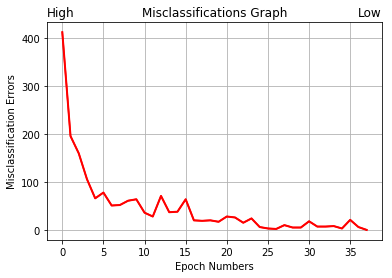

Total number of errors = 1723
Error Percentage = 17.23%


In [8]:
# Case 2
print("Case 2 Results :")
n = 1000
epoch = 0
E = 0.0
eta = 1.0
errors = []
multiclassPTA(w, epoch, E, eta, errors, n)
e = errorCalculations(testData, testLabels)
print("Total number of errors = {}".format(e[0]))
print("Error Percentage = {}%".format(e[1]))

# Note : 
The error rate has come down because in the previous iteration, we have updated the weights and same updated weights are again used. Thus, it is obvious that it would give a better result with the updated weights. That is the reason, we have 17.23% which is way lesser than in previous plot. Here it takes n = 37 or more to converge.

Case 3 Results :
Stopping Epoch is 31
-------------------
31
[10416, 9874, 8988, 9104, 9478, 9432, 9251, 9987, 9358, 9937, 9066, 8987, 10174, 9610, 8821, 9102, 9846, 9752, 9499, 8722, 9030, 9966, 9466, 8650, 10089, 9267, 9918, 9563, 9620, 8752, 8316]


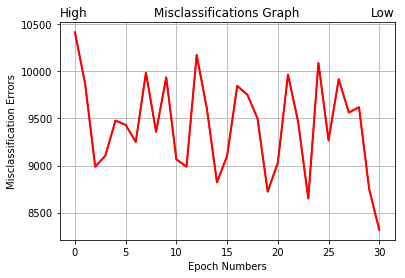

Total number of errors = 1598
Error Percentage = 15.98%


In [9]:
# Case 3
print("Case 3 Results :")
n = 60000
epoch = 0
E = 0.14
eta = 1.0
errors = []
multiclassPTA(w, epoch, E, eta, errors, n)
e = errorCalculations(testData, testLabels)
print("Total number of errors = {}".format(e[0]))
print("Error Percentage = {}%".format(e[1]))

# Note : 
There is constant rise and fall in the number of misclssified points which indicate that this does not converge. We also get an error rate of 15.98% on the test data which is in a similar range as the previous plot.

Case 4 Results :
First Time!
Stopping Epoch is 24
-------------------
24
[53228, 9603, 9849, 10196, 8670, 9367, 9535, 9336, 8611, 9308, 9276, 9858, 9748, 9463, 8861, 9234, 8559, 10274, 9164, 9289, 8944, 10003, 9440, 7962]


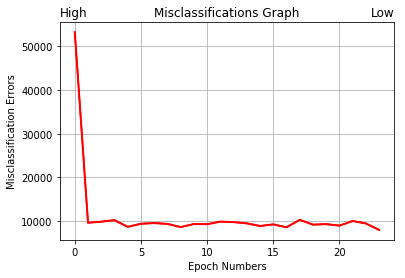

Total number of errors = 1482
Error Percentage = 14.82%


In [10]:
# Case 4
print("Case 4 Results :")
print("First Time!")
np.random.seed(1)
w = np.random.uniform(-1.0, 1.0, size)
n = 60000
epoch = 0
E = 0.14
eta = 1.0
errors = []
multiclassPTA(w, epoch, E, eta, errors, n)
e = errorCalculations(testData, testLabels)
print("Total number of errors = {}".format(e[0]))
print("Error Percentage = {}%".format(e[1]))

Second Time!
Stopping Epoch is 7
-------------------
7
[54810, 10505, 9826, 10207, 10030, 9320, 8201]


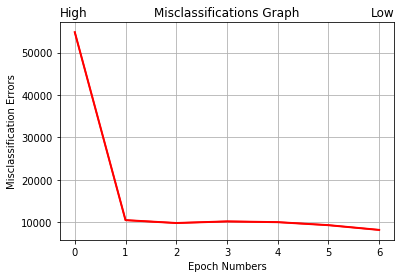

Total number of errors = 1652
Error Percentage = 16.520000000000003%


In [11]:
print("Second Time!")
np.random.seed(2)
w = np.random.uniform(-1.0, 1.0, size)
n = 60000
epoch = 0
E = 0.14
eta = 1.0
errors = []
multiclassPTA(w, epoch, E, eta, errors, n)
e = errorCalculations(testData, testLabels)
print("Total number of errors = {}".format(e[0]))
print("Error Percentage = {}%".format(e[1]))

Third Time!
Stopping Epoch is 27
-------------------
27
[54257, 10288, 9938, 9469, 9328, 10131, 10982, 9532, 9393, 8868, 9564, 9277, 9462, 8961, 9352, 9925, 8479, 10176, 9503, 10610, 9442, 9982, 9696, 9632, 9282, 8725, 8128]


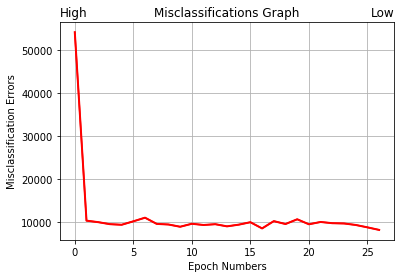

Total number of errors = 1577
Error Percentage = 15.770000000000001%


In [12]:
print("Third Time!")
np.random.seed(3)
w = np.random.uniform(-1.0, 1.0, size)
n = 60000
epoch = 0
E = 0.14
eta = 1.0
errors = []
multiclassPTA(w, epoch, E, eta, errors, n)
e = errorCalculations(testData, testLabels)
print("Total number of errors = {}".format(e[0]))
print("Error Percentage = {}%".format(e[1]))

# Note : 
Note that I have taken threshold value as 0.14. This is because even with new random weights, it still converges eventually. The threshold is small enough. The number of misclassified rate also is stabilized between 14 and 17 percentages. 